## Домашняя работа #2.
Домашнее задание сдаётся в виде ссылки (с доступом комментатор или редактор) на Colab в опросе: https://forms.gle/uLK765hzD8RhvyNx8

Отправлять ссылку через форму нужно только один раз. Исправления вносятся в тот же ноутбук до хард-дедлайна и помечаются комментариями в коде и комментариями к соотвествующим ячейкам.

Эта домашка про Фурье и немного про простейшие фильтры.

**Soft deadline: 10.02.2022 03:00:00 +0003 GMT**

**Hard deadline: 17.02.2022 03:00:00 +0003 GMT**

Ссылка на материалы: https://drive.google.com/drive/folders/1WZsXgicKZYJ4-OOGGQcLUpj7T_u60for?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip /content/drive/MyDrive/homework2-materials.zip

In [2]:
from pathlib import Path
sources_path = Path('/content/homework2-materials')

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt
% matplotlib inline
plt.style.use('default')
from google.colab.patches import cv2_imshow
# from matplotlib.pyplot import plot


def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=(5, 3))
        ax = plt.axes([0, 0, 1, 1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)

    return make_pyplot_context


@pyplot
def show_bgr(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


@pyplot
def show_gray(img):
    plt.imshow(img, cmap='gray')


def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()

**1. (5 баллов)**

Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

In [4]:
# import cv2
# import numpy as np

# import matplotlib.pyplot as plt

In [5]:
def create_mask(image, radius, filter_type):
    h, w = image.shape
    center = h // 2, w // 2
    x, y = np.ogrid[:h, :w]
    mask_area = ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2)

    if filter_type == 'LPF':
        mask = np.zeros((h, w, 2), np.uint8)
        mask[mask_area] = 1
    else:
        mask = np.ones((h, w, 2), np.uint8)
        mask[mask_area] = 0
    return mask

In [6]:
def pprint_filters(img, r, filter_type='LPF'):  

    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)  # Initial image
    dft_shift = np.fft.fftshift(dft)  # Shifted
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))  # 2nd picture

    mask = create_mask(img, r, filter_type=filter_type)
    fshift = dft_shift * mask
    fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + 1)

    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1] + 1)


    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(1, 4, 1)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input Image')
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)

    ax2 = fig.add_subplot(1, 4, 2)
    ax2.imshow(magnitude_spectrum, cmap='gray')
    ax2.title.set_text('FFT of image')
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)


    ax3 = fig.add_subplot(1, 4, 3)
    ax3.imshow(fshift_mask_mag, cmap='gray')
    ax3.title.set_text('FFT + Mask')
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)

    ax4 = fig.add_subplot(1, 4, 4)
    ax4.imshow(img_back, cmap='gray')
    ax4.title.set_text('After inverse FFT')
    ax4.axes.get_xaxis().set_visible(False)
    ax4.axes.get_yaxis().set_visible(False)
    plt.show()

    

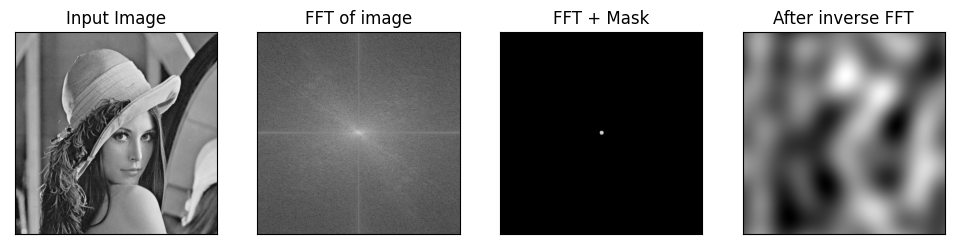

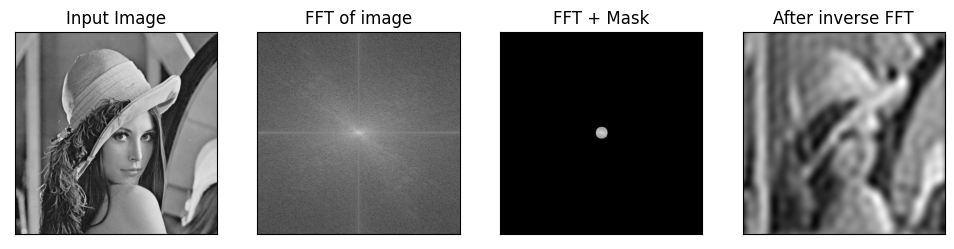

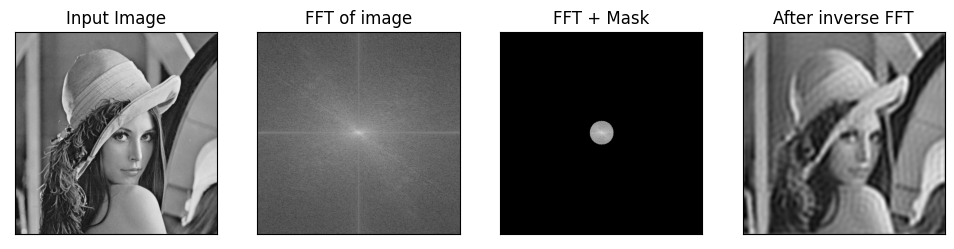

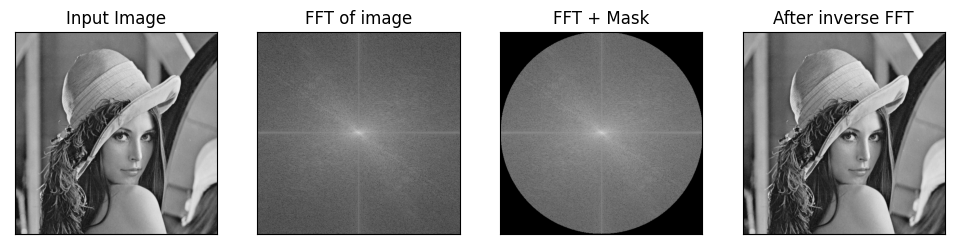

In [7]:
lena = cv2.imread(str(sources_path / "lena.jpg"), 0)
R = [5, 15, 30, 255]
for r in R:
    pprint_filters(lena, r=r)
    print()

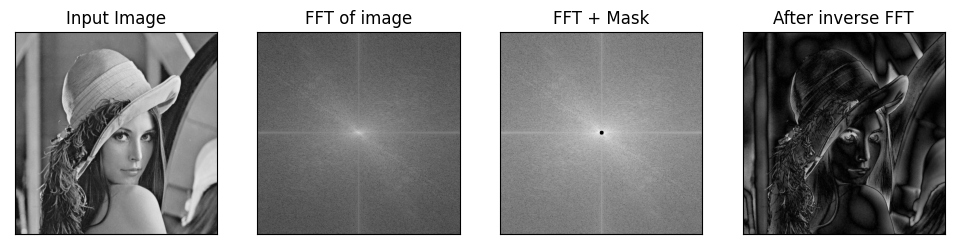

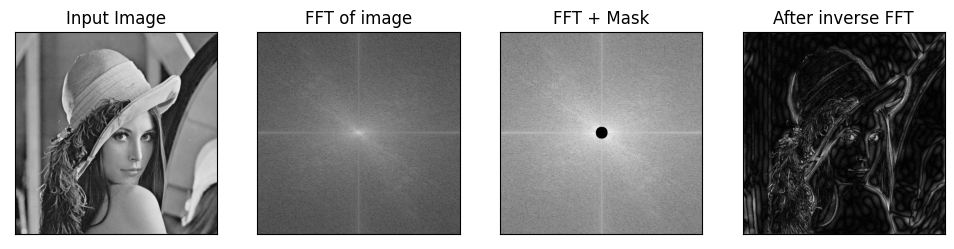

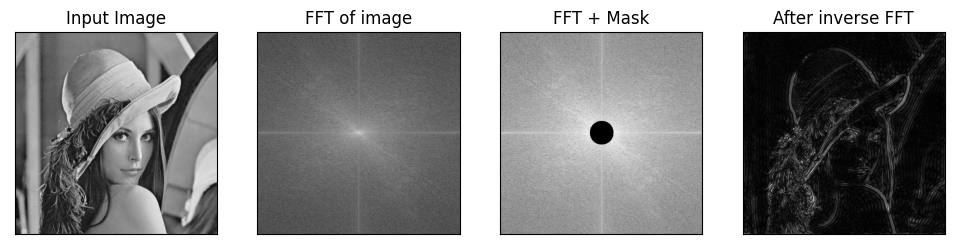

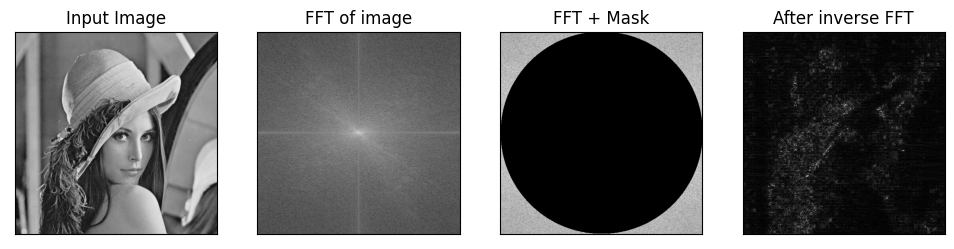

In [8]:
R = [5, 15, 30, 255]
for r in R:
    pprint_filters(lena, r=r, filter_type="HPF")
    print()

**2. (5 баллов)**

Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url {http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$.

3484.66450881958


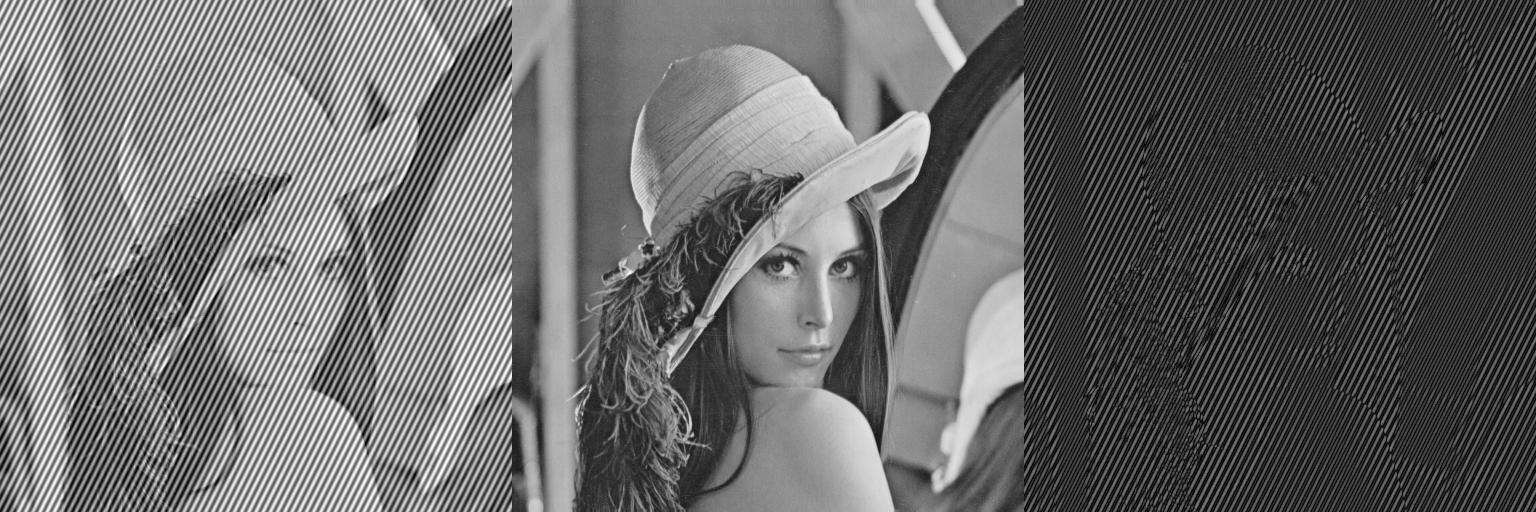

In [9]:
lena_diag = cv2.imread(str(sources_path / "lena_diagonal.jpg"), 0)
lena_gray_fix = cv2.imread(str(sources_path / "lena_gray_512.tif"), 0)

print(mse(lena_diag, lena_gray_fix))
res = np.hstack(
    [lena_diag.astype(int), lena_gray_fix.astype(int), 
     np.abs(lena_diag.astype(int) - lena_gray_fix.astype(int))])

cv2_imshow(res)

MSE: 917.8948974609375


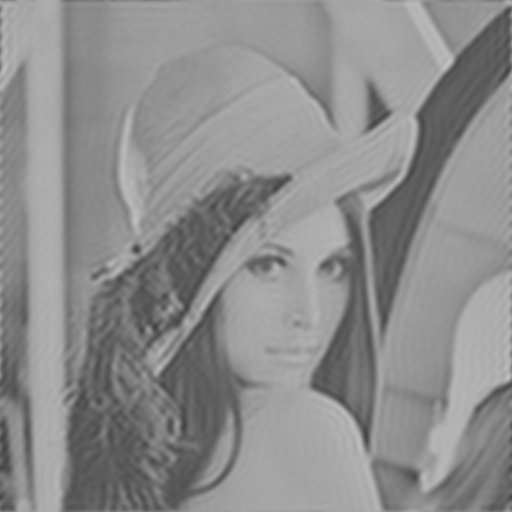

In [10]:
im_fft = np.fft.fft2(lena_diag)
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r * keep_fraction):int(r * (1 - keep_fraction))] = 0
im_fft2[:, int(c * keep_fraction):int(c * (1 - keep_fraction))] = 0

im_new = np.fft.ifft2(im_fft2).real
print(f"MSE: {mse(lena, im_new)}")
cv2_imshow(im_new)

**3. (10 баллов)**

Теперь предложите решение, которое бы работало для любого шума подобной природы. (синусоида некотрой частоты под некоторым углом) Смоделируйте изображение с шумом и предложите универсальный алгоритм, который решит задачу. 
Тот, у кого по результатам проверки будет наименьшее значение MSE для предлженной картинки, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)
Учтите, что помимо синусоидального шума, могут быть применены другие преобразования яркости.

---

Уточнение того, что требуется сделать:

* написать параметризованный генератор шума, которому можно задать произвольный угол, частоту полос и силу перекрытия, и получить шум с заданными параметрами

* усовершенствовать алгоритм из второй задачи, чтобы он работал на произвольных параметрах шума; тут полезно сделать интерактивный виджет, с помощью которого можно менять параметры шума и смотреть как справляется с ним алгоритм; интерактивный виджет проще всего сделать так:

    ```python
    from ipywidgets import interact

    @interact(angle=(0, 360, 1), freq=(1, 64, 1))
    def anim_general_solution(angle=45, freq=32):
        # visualization code here
    ```

* после обобщенным алгоритмом отчистить изображение из задачи 2 и посчитать MSE с чистым изображением, по этому MSE и будет конкурс за призовую шоколадку

In [11]:
def create_noise(img, angle, freq):
    n_row, n_column = img.shape

    alpha = angle * np.pi / 180

    img_new = np.array([
        [np.sin((i * np.cos(alpha) + j * np.sin(alpha)) / freq)
         for j in range(n_row)] for i in range(n_column)])

    return img_new

Если не знаешь, какие фильтры использовать, то можно попытаться их выучить

In [12]:
import torch.nn as nn
import torch

class Model(nn.Module):
    def __init__(self, is_gray: bool):
        super().__init__()
        
        self.is_gray = is_gray
        
        n_channels = 1
        self.conv1 = nn.Conv2d(n_channels, n_channels, 3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(n_channels, n_channels, 5, stride=1, padding=2)
        
        

    def forward(self, image: torch.Tensor) -> torch.Tensor:
        image1 = self.conv1(image)
        image2 = self.conv2(image)
        
        return (image1 + image2) / 2

    def transform_img(self, image: np.ndarray) -> torch.Tensor:
        image_batch = torch.tensor(image, dtype=torch.float).unsqueeze(0)
        image_batch /= 255
        if self.is_gray:
            image_batch = image_batch.unsqueeze(3)     
        image_batch = image_batch.permute(0, 3, 1, 2)  
        return image_batch
    
    def apply_filter(self, image: np.ndarray) -> np.ndarray:
        with torch.no_grad():
            image_batch = self.transform_img(image)
            pred = self(image_batch).permute(0, 2, 3, 1).squeeze()
            pred = torch.clip(pred * 255, 0, 255)
            new_image = pred.numpy().astype(np.uint8)
            return new_image

def get_best_filter(noise_image: np.ndarray,
                    target_image: np.ndarray,
                    is_gray: bool,
                    n_epochs: int = 100) -> np.ndarray:
    model = Model(is_gray)
    image_batch = model.transform_img(noise_image)
    target = model.transform_img(target_image)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.5)
    mse_loss = nn.MSELoss()

    
    for _ in range(n_epochs):
        pred = model(image_batch)
        loss = mse_loss(pred.reshape(1, -1), target.reshape(1, -1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
    
    return model

Потестим на задании 2:

MSE: 520.8735198974609


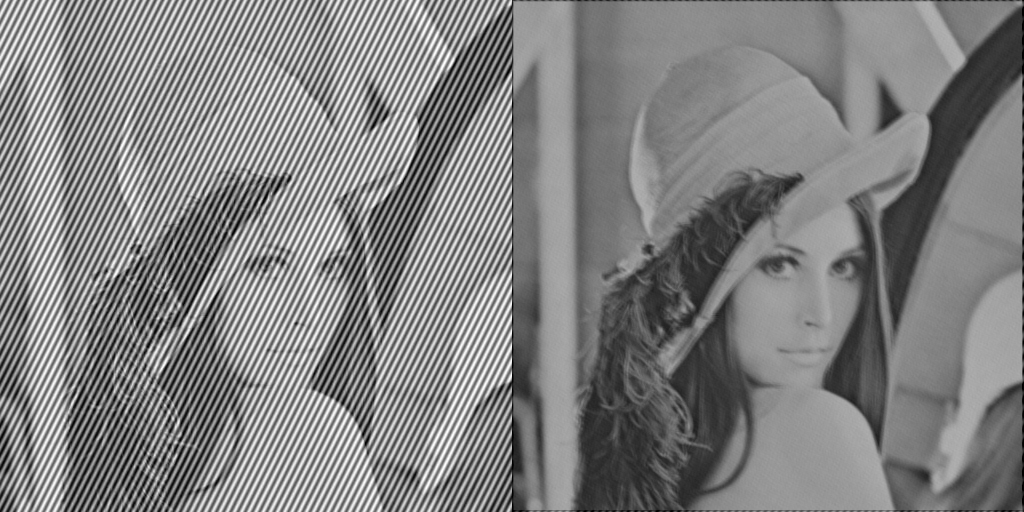

In [13]:
lena_diag = cv2.imread(str(sources_path / "lena_diagonal.jpg"), 0)
model = get_best_filter(lena_diag, lena, True)
denoised_image = model.apply_filter(lena_diag)
print(f"MSE: {mse(denoised_image, lena)}")
res = np.hstack([lena_diag, denoised_image])
cv2_imshow(res)

In [14]:
from ipywidgets import interact

@interact(angle=(0, 360, 1), freq=(1, 64, 1))
def anim_general_solution(angle=45, freq=32):
      noise = create_noise(lena, angle, freq)
      
      lena_diag = noise * lena

      model = get_best_filter(lena_diag, lena, True)
      denoised_image = model.apply_filter(lena_diag)
      
      print(f"MSE: {round(mse(denoised_image, lena), 2)}")
    

      res = np.hstack([lena_diag, denoised_image])
      
      cv2_imshow(res)


      

interactive(children=(IntSlider(value=45, description='angle', max=360), IntSlider(value=32, description='freq…

**4. (5 баллов)**

Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

In [15]:
img_noised = cv2.imread(str(sources_path / "lena_color_512-noise.tif"))
img_colored = cv2.imread(str(sources_path / "lena_color_512.tif"))

print(mse(img_noised, img_colored))
res = np.hstack([img_noised, img_colored, np.abs(img_noised - img_colored)])
cv2_imshow(res)

Output hidden; open in https://colab.research.google.com to view.

# Попробуем фильтры из cv2:

MSE: 84.65309015909831


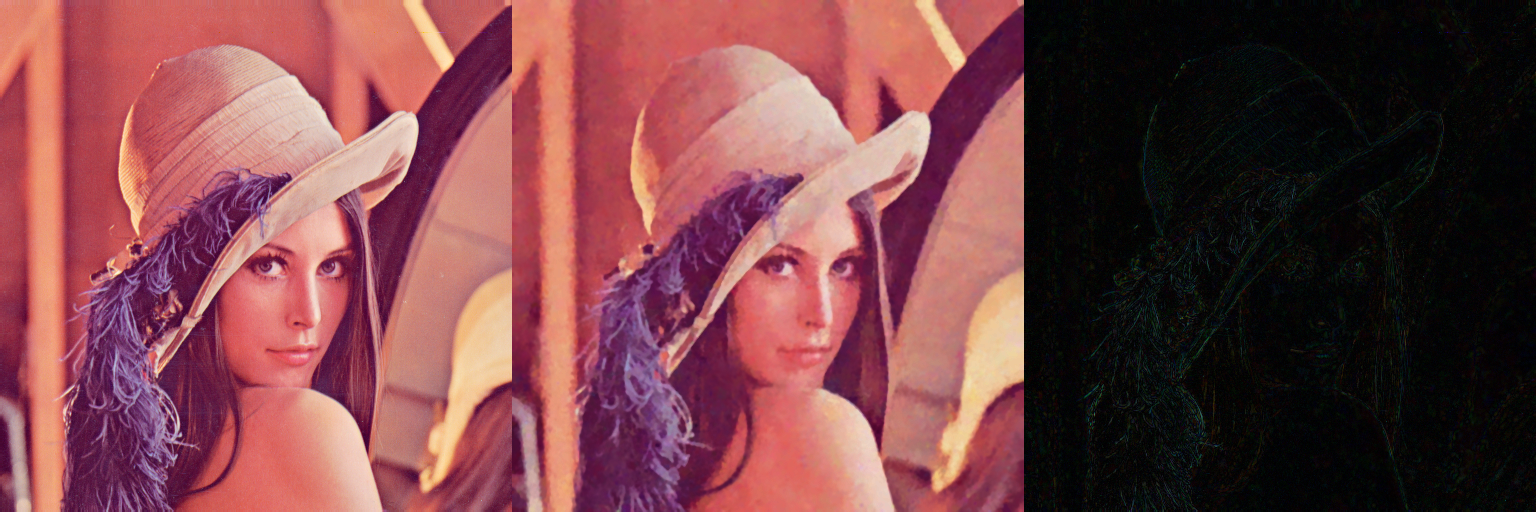

In [16]:
def noise_filtering(img_noised):
    

    median = cv2.medianBlur(img_noised, 3)
    gaussian = cv2.GaussianBlur(median, (3, 3), 0)
    bilateral = cv2.bilateralFilter(gaussian, 21, 29, 5)
    bilateral = cv2.bilateralFilter(bilateral, 0, 5, 47)
    denoise = cv2.fastNlMeansDenoisingColored(bilateral, None, 3, 5, 49, 3)
    denoise = cv2.detailEnhance(denoise, 25, 0.27)
    
    return denoise

denoise = noise_filtering(img_noised)
res = np.hstack((img_colored, denoise, np.abs(denoise.astype(int) - img_colored.astype(int))))
print("MSE:", mse(denoise.astype(int),  img_colored.astype(int)))
cv2_imshow(res)

**5. (5 баллов)**

Выделите границы на изображении **cat.jpg**:

* при помощи градиента и фильтров собеля
* при помощи лапласиана
* используя алгоритм $canny$

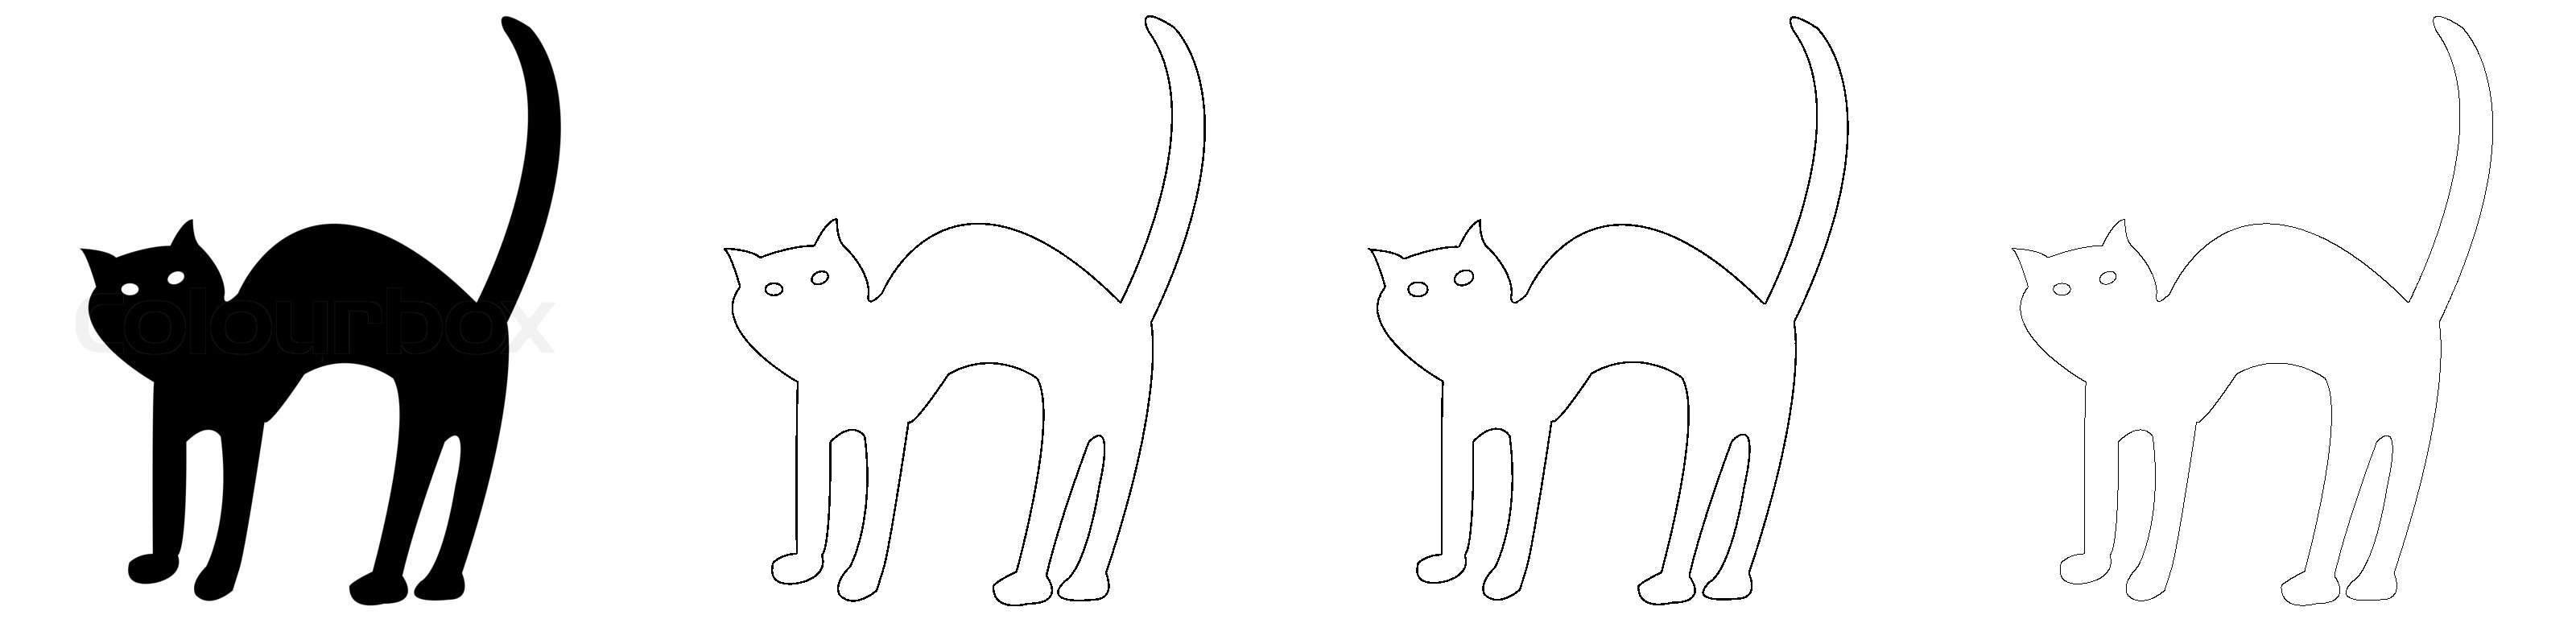

In [17]:
img = cv2.imread(str(sources_path / "cat.jpg"), 0)

x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
y = cv2.Sobel(img,cv2.CV_64F, 0, 1, ksize=3)

laplace = cv2.Laplacian(img, cv2.CV_64F,ksize=5)

border_sobel = 255 - 255 * (x**2 + y**2 > 80000)
border_laplac = 255 - 255 * (laplace > 500)
border_canny = 255 - cv2.Canny(img, 200, 500)

cv2_imshow(np.hstack([img, border_sobel, border_laplac,border_canny]))